In [1]:
from simple_back.backtester import BacktesterBuilder

In [2]:
builder = (
   BacktesterBuilder()
   .name('Some Strategy')
   .balance(10_000)
   .calendar('NYSE')
   .live_plot() # we assume we are running this in a Jupyter Notebook
   .slippage()
)

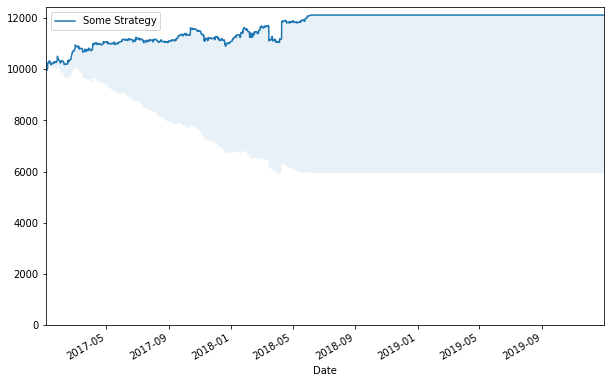

/home/cdminix/Documents/simple-back/simple_back/backtester.py:983: UserWarning: MON discontinued on 2018-06-07, liquidating at previous day's open price
  warn(w)


In [3]:
bt = builder.build()
for day, event, b in bt['2017-1-1':'2020-1-1']:
    if not b.pf or True:
        b.pf.liquidate()
        try:
            b.long('MON', percent=1)
        except:
            pass

In [7]:
bt.summary.iloc[0]['Total Return (%) (Last Value)']

21.14060516357421

In [9]:
bt.prices['DELL']

,open,close,high,low
2016-08-17,24.086378,23.809525,24.363234,23.809525
2016-08-18,24.363234,23.671097,24.363234,23.532669
2016-08-19,23.643412,24.086378,24.086378,23.615725
2016-08-22,23.809525,24.169436,25.249170,23.588039
2016-08-23,24.224806,24.916943,25.415283,24.086378
...,...,...,...,...
2019-12-24,50.450001,50.830002,51.330002,50.250000
2019-12-26,51.259998,52.009998,52.279999,51.110001
2019-12-27,52.200001,50.980000,52.200001,50.700001
2019-12-30,50.880001,50.910000,51.560001,50.500000


In [28]:
from simple_back.data_providers import YahooFinanceProvider
from datetime import date

In [29]:
prices = YahooFinanceProvider()

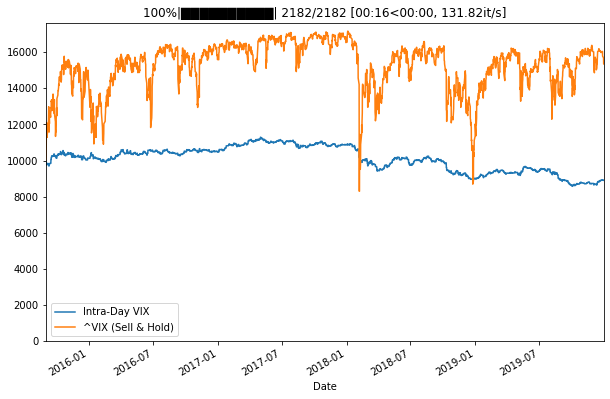

In [45]:
bt = builder.build()
for day, event, b in bt['2015-9-1':'2020-1-1']:
    if event == 'open':
        b.short('^GSPC', percent=.45)
        b.long('ZIV', percent=.45)
    if event == 'close':
        b.pf.short.liquidate()
        b.pf.long.liquidate()

In [49]:
b.prices['MSFT', '2012-3-31']

KeyError: '2012-3-31'

In [56]:
b.prices['MSFT'].loc['2012-3-30']

open     26.752937
close    26.637335
high     26.761192
low      26.455681
Name: 2012-03-30 00:00:00, dtype: float64

In [53]:
import pandas_market_calendars as mcal

In [55]:
mcal.exchange_calendar_nyse.USMemorialDay

Holiday: Memorial Day (month=5, day=25, offset=<DateOffset: weekday=MO(+1)>)